# Hand Gesture Recognition

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from scipy.fft import fft, fftfreq

In [2]:
data_dir = '../recordings/01_12_24_initial_placement_test/data'

for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../recordings/01_12_24_initial_placement_test/data\gilbert_fist_0.csv
../recordings/01_12_24_initial_placement_test/data\gilbert_index_0.csv
../recordings/01_12_24_initial_placement_test/data\gilbert_middle_0.csv
../recordings/01_12_24_initial_placement_test/data\gilbert_neutral_0.csv
../recordings/01_12_24_initial_placement_test/data\gilbert_ok_0.csv
../recordings/01_12_24_initial_placement_test/data\gilbert_peace_0.csv
../recordings/01_12_24_initial_placement_test/data\gilbert_thumb_0.csv
../recordings/01_12_24_initial_placement_test/data\nad_fist_0.csv
../recordings/01_12_24_initial_placement_test/data\nad_index_0.csv
../recordings/01_12_24_initial_placement_test/data\nad_middle_0.csv
../recordings/01_12_24_initial_placement_test/data\nad_neutral_0.csv
../recordings/01_12_24_initial_placement_test/data\nad_ok_0.csv
../recordings/01_12_24_initial_placement_test/data\nad_peace_0.csv
../recordings/01_12_24_initial_placement_test/data\nad_thumb_0.csv


Our initial static gesture recording includes 7 classes: neutral, fist, index finger, middle finger, ok, peace, thumb.

In [3]:
#test_person = 'gilbert'
test_person = 'nad'

In [4]:
neutral_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_neutral_0.csv'), header=None)
fist_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_fist_0.csv'), header=None)
index_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_index_0.csv'), header=None)
middle_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_middle_0.csv'), header=None)
ok_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_ok_0.csv'), header=None)
peace_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_peace_0.csv'), header=None)
thumb_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_thumb_0.csv'), header=None)

In [5]:
neutral_df['class'] = 0
fist_df['class'] = 1
index_df['class'] = 2
middle_df['class'] = 3
ok_df['class'] = 4
peace_df['class'] = 5
thumb_df['class'] = 6

In [6]:
len(neutral_df), len(fist_df), len(index_df), len(middle_df), len(ok_df), len(peace_df), len(thumb_df)

(38803, 43357, 14476, 14901, 14970, 14768, 16342)

Optional subsampling:

In [7]:
num_samples = 3000

neutral_df = neutral_df.sample(num_samples)
fist_df = fist_df.sample(num_samples)
index_df = index_df.sample(num_samples)
middle_df = middle_df.sample(num_samples)
ok_df = ok_df.sample(num_samples)
peace_df = peace_df.sample(num_samples)
thumb_df = thumb_df.sample(num_samples)

In [8]:
len(neutral_df), len(fist_df), len(index_df), len(middle_df), len(ok_df), len(peace_df), len(thumb_df)

(3000, 3000, 3000, 3000, 3000, 3000, 3000)

In [9]:
neutral_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,class
5023,18519,18517,18510,18527,18511,18508,18501,18514,18002,17979,...,18332,18069,18100,18108,18084,18087,18125,18140,18122,0
26848,18588,18594,18586,18589,18589,18584,18604,18594,18196,18206,...,17827,18455,18471,18474,18474,18456,18435,18449,18462,0
7903,17363,17364,17380,17373,17354,17345,17369,17383,17622,17623,...,18154,17485,17473,17460,17475,17491,17536,17541,17539,0
17126,17508,17506,17496,17492,17531,17538,17533,17531,17555,17565,...,17845,17946,17968,17974,17987,17993,17988,17960,17934,0
3109,17859,17864,17866,17886,17888,17868,17845,17852,17995,17981,...,18287,17543,17561,17562,17547,17535,17539,17559,17572,0


In [10]:
fist_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,class
25915,17792,17918,17974,18010,18127,18146,18076,18032,17956,17921,...,19058,18276,18074,17977,17877,17699,17666,17576,17717,1
5801,18537,18479,18424,18397,18394,18404,18414,18339,17395,17431,...,18766,17875,18013,17921,17527,17716,18013,18070,18054,1
8918,18397,18435,18448,18383,18382,18341,18341,18270,18169,18090,...,18469,18021,18065,17920,17924,18077,18207,18262,18318,1
8786,18027,18101,18114,18061,18024,18059,18070,18007,17691,17694,...,18605,17940,17817,17655,17709,17870,17987,17974,17943,1
15154,17391,17448,17434,17488,17600,17687,17754,17808,18288,18251,...,17839,17889,17847,17809,17744,17698,17857,17955,17793,1


Combine dataframes

In [11]:
df = pd.concat([neutral_df, fist_df, index_df, middle_df, ok_df, peace_df, thumb_df], ignore_index=True)

print(df.head())
print(df.iloc[:, -1].value_counts())

       0      1      2      3      4      5      6      7      8      9  ...  \
0  18519  18517  18510  18527  18511  18508  18501  18514  18002  17979  ...   
1  18588  18594  18586  18589  18589  18584  18604  18594  18196  18206  ...   
2  17363  17364  17380  17373  17354  17345  17369  17383  17622  17623  ...   
3  17508  17506  17496  17492  17531  17538  17533  17531  17555  17565  ...   
4  17859  17864  17866  17886  17888  17868  17845  17852  17995  17981  ...   

      23     24     25     26     27     28     29     30     31  class  
0  18332  18069  18100  18108  18084  18087  18125  18140  18122      0  
1  17827  18455  18471  18474  18474  18456  18435  18449  18462      0  
2  18154  17485  17473  17460  17475  17491  17536  17541  17539      0  
3  17845  17946  17968  17974  17987  17993  17988  17960  17934      0  
4  18287  17543  17561  17562  17547  17535  17539  17559  17572      0  

[5 rows x 33 columns]
class
0    3000
1    3000
2    3000
3    3000
4    3

In [12]:
sensor_data = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Data visualization

## Sensor signals

In [13]:
def plot_time_signals(dataframe, row_index, title):
    num_sensors = 4
    row_data = dataframe.iloc[row_index, :-1]

    # Split the row into 8 groups corresponding to sensors
    signals = np.array_split(row_data.values, num_sensors)

    # Plot each sensor's signal
    plt.figure(figsize=(12, 6))
    for i, signal in enumerate(signals):
        plt.plot(signal, label=f'Sensor {i + 1}')
    
    plt.title(f"{title} (Row {row_index})")
    plt.xlabel("Time Steps")
    plt.ylabel("Signal Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

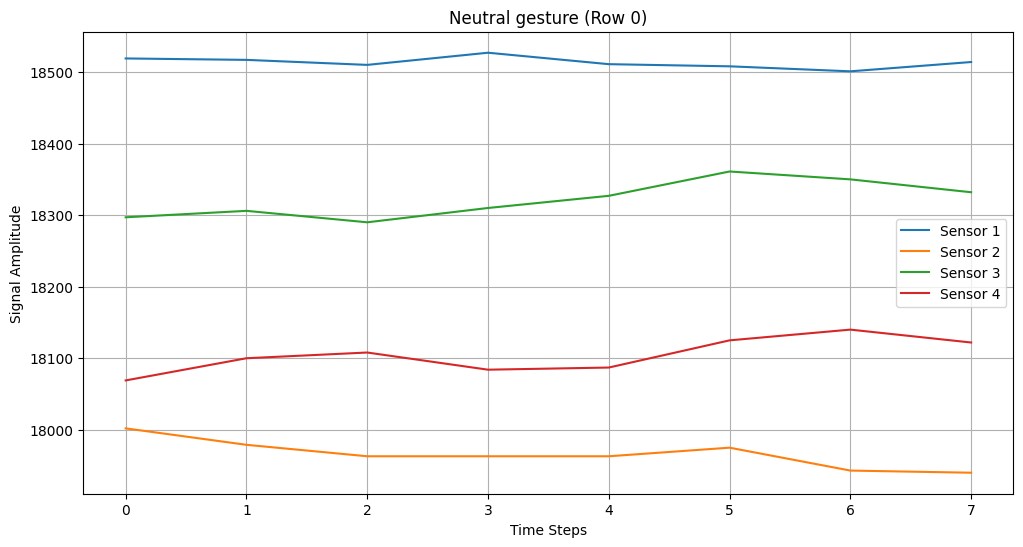

In [14]:
plot_time_signals(neutral_df, row_index=0, title='Neutral gesture')

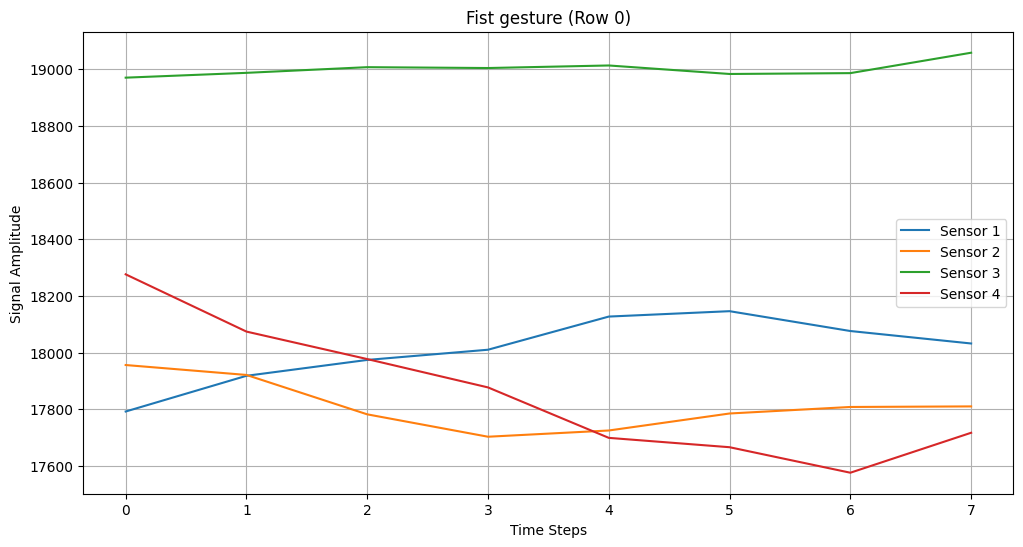

In [15]:
plot_time_signals(fist_df, row_index=0, title='Fist gesture')

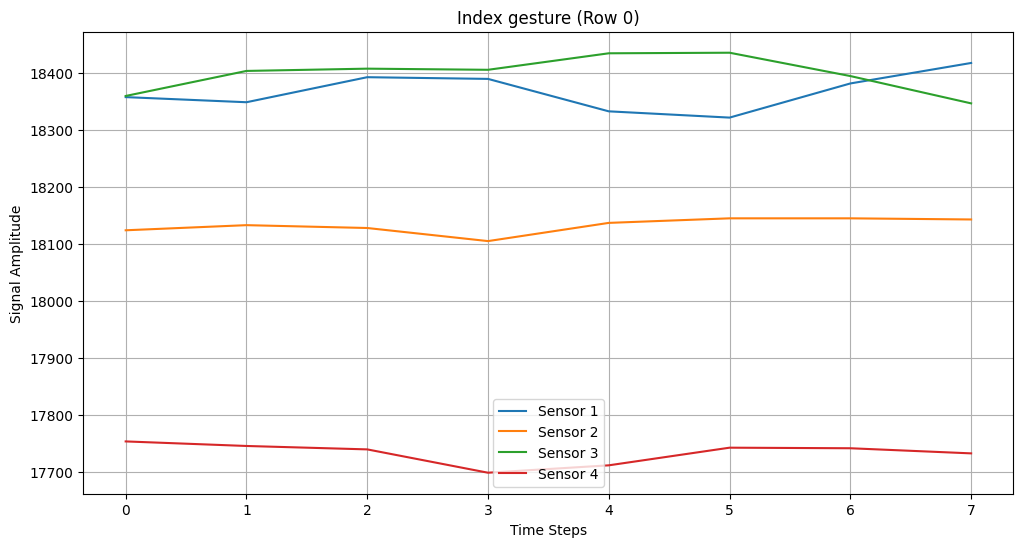

In [16]:
plot_time_signals(index_df, row_index=0, title='Index gesture')

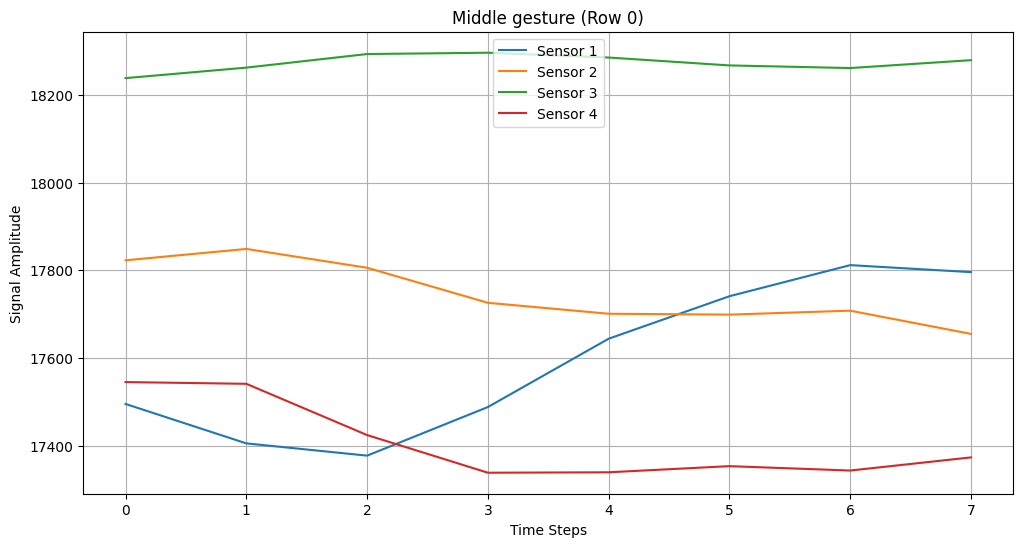

In [17]:
plot_time_signals(middle_df, row_index=0, title='Middle gesture')

## Class distribution

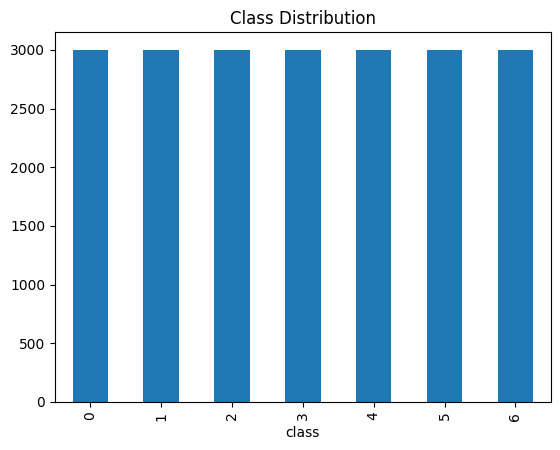

In [18]:
df.iloc[:, -1].value_counts().plot(kind='bar', title="Class Distribution")
plt.show()

## Sensor correlation analysis

C:\Users\Gilbert\AppData\Local\Temp\ipykernel_19252\515862046.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sensor_means = sensor_data.groupby(np.arange(sensor_data.shape[1]) // 8, axis=1).mean()


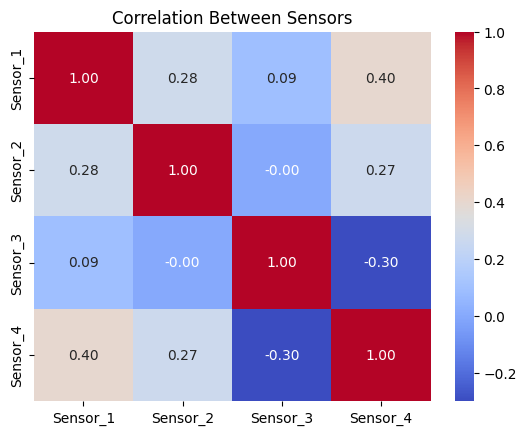

In [19]:
sensor_means = sensor_data.groupby(np.arange(sensor_data.shape[1]) // 8, axis=1).mean()

sensor_means.columns = [f"Sensor_{i+1}" for i in range(4)]

correlation = sensor_means.corr()

sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Sensors")
plt.show()

## Dimensionality Reduction

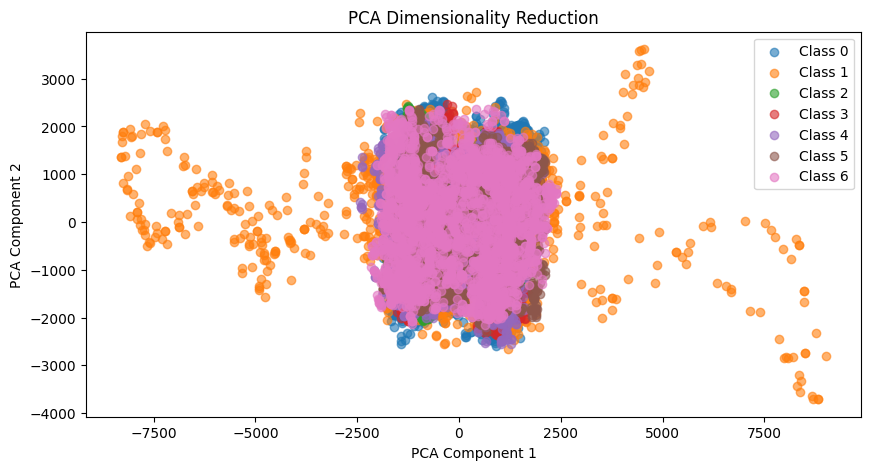

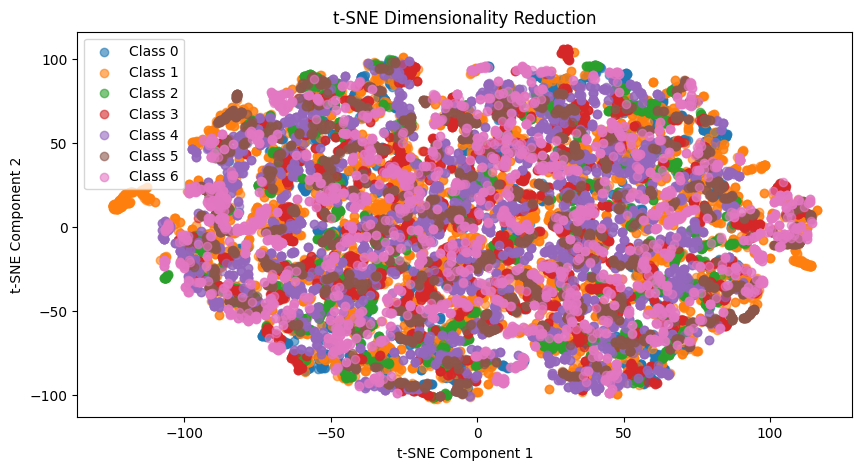

In [20]:
# PCA Dimensionality Reduction to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sensor_data)

# Plot PCA results
plt.figure(figsize=(10, 5))
for class_id in np.unique(labels):
    plt.scatter(pca_result[labels == class_id, 0], pca_result[labels == class_id, 1], label=f'Class {class_id}', alpha=0.6)
plt.title("PCA Dimensionality Reduction")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# t-SNE Dimensionality Reduction to 2 components
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(sensor_data)

# Plot t-SNE results
plt.figure(figsize=(10, 5))
for class_id in np.unique(labels):
    plt.scatter(tsne_result[labels == class_id, 0], tsne_result[labels == class_id, 1], label=f'Class {class_id}', alpha=0.6)
plt.title("t-SNE Dimensionality Reduction")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()

## Spectal Analysis

In [21]:
def spectral_analysis_overall(dataframe):
    num_sensors = 4
    time_steps_per_sensor = dataframe.shape[1] // num_sensors

    # Separate gesture class and sensor data
    gesture_classes = dataframe.iloc[:, -1]
    sensor_data = dataframe.iloc[:, :-1]
    
    # Prepare to store FFT results for each sensor
    fft_results = {f'Sensor_{i+1}': [] for i in range(num_sensors)}

    # Loop over all rows and accumulate FFT results per sensor
    for index, row in sensor_data.iterrows():
        signals = np.array_split(row.values, num_sensors)
        for i, signal in enumerate(signals):
            fft_result = np.abs(fft(signal))[:time_steps_per_sensor // 2]  # Positive frequencies only
            fft_results[f'Sensor_{i+1}'].append(fft_result)
    
    # Compute average FFT amplitude for each sensor
    avg_fft_results = {sensor: np.mean(fft_results[sensor], axis=0) for sensor in fft_results}

    # Plot average FFT for each sensor
    plt.figure(figsize=(15, 10))
    for sensor, avg_fft in avg_fft_results.items():
        freqs = fftfreq(time_steps_per_sensor, d=1/200)[:time_steps_per_sensor // 2]  # Positive frequencies
        plt.plot(freqs, avg_fft, label=sensor)
    
    plt.title("Average Spectral Analysis for All Sensors")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Now analyze by gesture class
    unique_classes = np.unique(gesture_classes)
    plt.figure(figsize=(15, 10))
    for gesture_class in unique_classes:
        class_subset = dataframe[dataframe.iloc[:, -1] == gesture_class]
        class_fft_results = {f'Sensor_{i+1}': [] for i in range(num_sensors)}
        for _, row in class_subset.iloc[:, :-1].iterrows():
            signals = np.array_split(row.values, num_sensors)
            for i, signal in enumerate(signals):
                fft_result = np.abs(fft(signal))[:time_steps_per_sensor // 2]
                class_fft_results[f'Sensor_{i+1}'].append(fft_result)
        # Average across this class
        avg_class_fft = np.mean([np.mean(class_fft_results[sensor], axis=0) for sensor in class_fft_results], axis=0)
        freqs = fftfreq(time_steps_per_sensor, d=1/200)[:time_steps_per_sensor // 2]
        plt.plot(freqs, avg_class_fft, label=f"Class {gesture_class}")

    plt.title("Average Spectral Analysis by Gesture Class")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

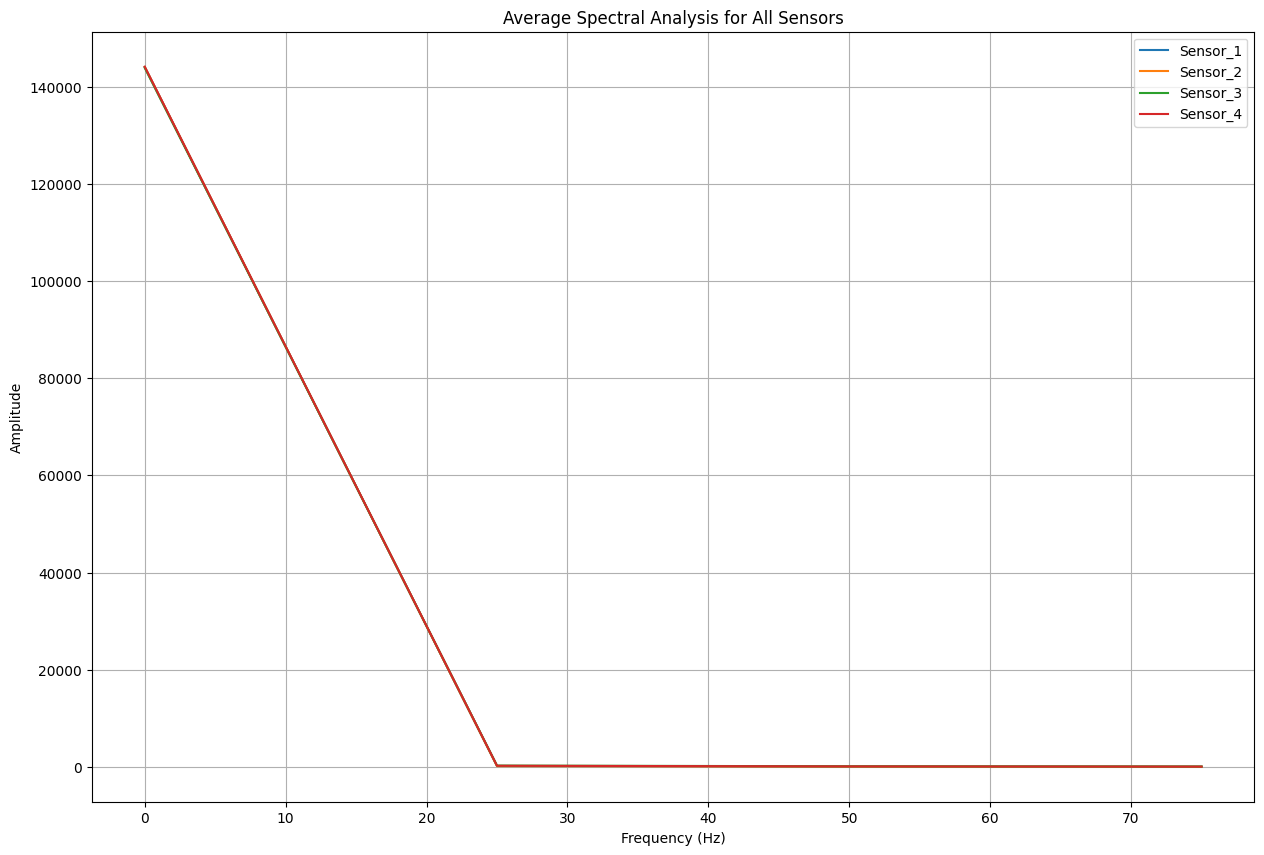

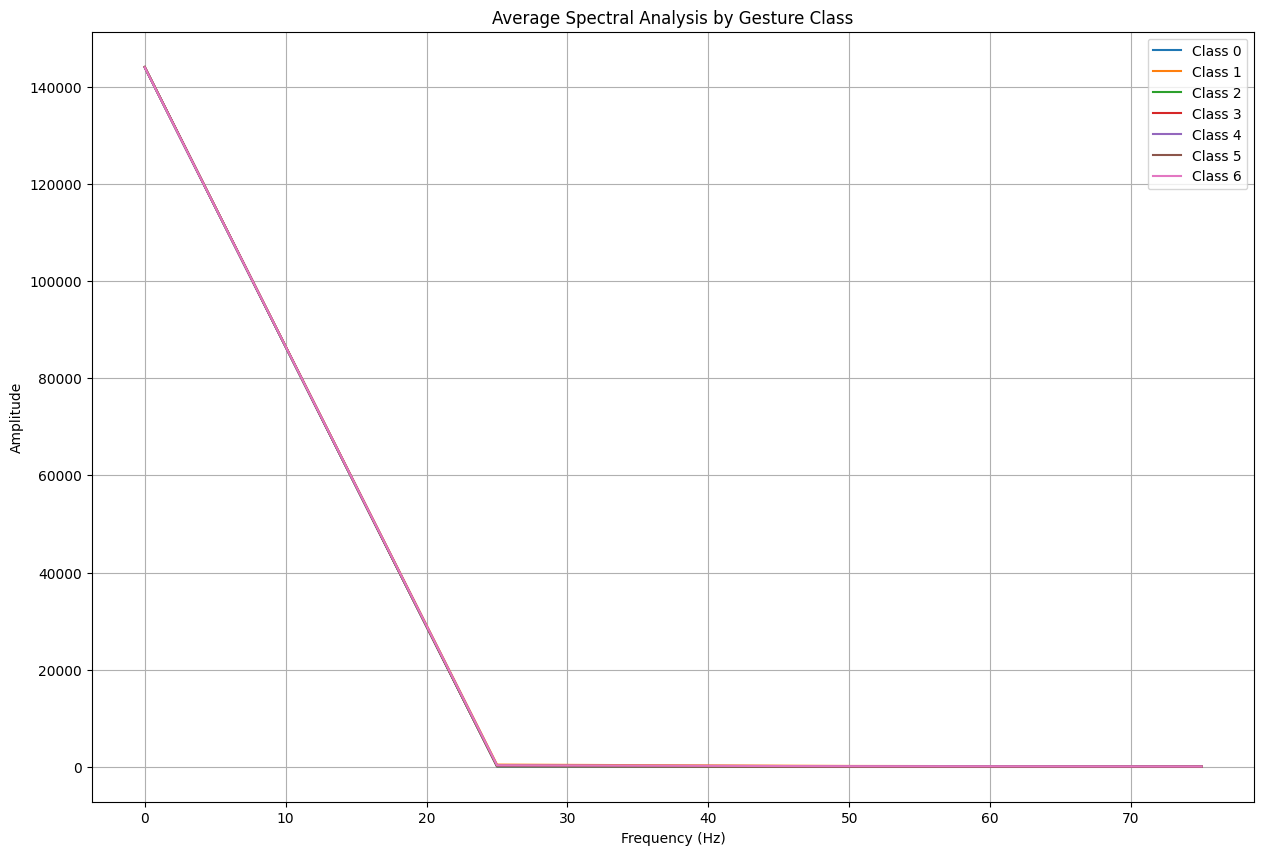

In [22]:
spectral_analysis_overall(df)

## Train networks

In [23]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [24]:
from scipy import signal
from scipy.signal import butter

lf = 50
hf = 400

def preprocess_data(data):
    sos = butter(3, (lf, hf), btype="bandpass", fs=1150, output="sos")
    return signal.sosfilt(sos, data)

In [25]:
X = preprocess_data(X)

In [26]:
X.max(), X.min()

(12016.850775922254, -7098.351216262879)

In [27]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [28]:
from pickle import dump
with open("custom_scaler.pkl", "wb") as f:
    dump(scaler, f, protocol=5)

In [29]:
X.max(), X.min()

(10.852691927748646, -14.347017687398486)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [31]:
# Count classes in y_test
unique, counts = np.unique(y_test, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([566, 627, 621, 580, 625, 608, 573], dtype=int64))

## Classical models

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
from pickle import dump
with open("custom_classifier.pkl", "wb") as f:
    dump(clf, f, protocol=5)

In [34]:
y_pred = clf.predict(X_test)

In [35]:
print('Classification Report: \n', classification_report(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       566
           1       0.88      0.76      0.82       627
           2       0.82      0.88      0.85       621
           3       0.83      0.83      0.83       580
           4       0.91      0.95      0.93       625
           5       0.86      0.84      0.85       608
           6       0.82      0.78      0.80       573

    accuracy                           0.84      4200
   macro avg       0.84      0.84      0.84      4200
weighted avg       0.84      0.84      0.84      4200

Confusion Matrix: 
 [[492   0  41  12   0  20   1]
 [ 17 475  10  34  17  10  64]
 [ 33   1 545   8   4  25   5]
 [ 30   7  24 479   9  13  18]
 [  3   0   3  10 594   4  11]
 [ 44   1  38  12   2 509   2]
 [ 10  54   5  20  30   8 446]]


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

lr_grid = {'max_depth' : [4, 8, 16, 32, 64, 128],
           'criterion' : ['entropy', 'gini']}

clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)

gs = GridSearchCV(estimator=clf, param_grid=lr_grid, cv=5)
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)

In [37]:
print('Classification Report: \n', classification_report(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.83       566
           1       0.88      0.76      0.82       627
           2       0.82      0.88      0.85       621
           3       0.83      0.82      0.83       580
           4       0.90      0.95      0.93       625
           5       0.86      0.84      0.85       608
           6       0.82      0.78      0.80       573

    accuracy                           0.84      4200
   macro avg       0.84      0.84      0.84      4200
weighted avg       0.84      0.84      0.84      4200

Confusion Matrix: 
 [[493   0  40  13   0  19   1]
 [ 17 477  10  34  17  11  61]
 [ 33   1 545   7   5  25   5]
 [ 31   7  23 477  10  14  18]
 [  3   0   4  10 594   3  11]
 [ 42   1  38  12   2 511   2]
 [ 10  54   5  21  30   8 445]]


In [38]:
from pickle import dump
with open("custom_classifier.pkl", "wb") as f:
    dump(gs, f, protocol=5)

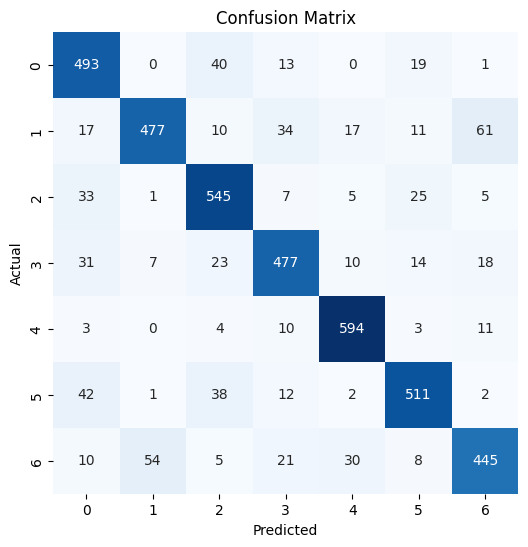

In [39]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Deep Learning

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [41]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(1024, 1024)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(1024, output_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.softmax(self.fc3(x), dim=1)
        return x

In [42]:
input_size = X_train.shape[1]
output_size = 7
batch_size = 64
epochs = 50
learning_rate = 0.001

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

model = NeuralNet(input_size, output_size)
criterion = nn.CrossEntropyLoss()  # Sparse categorical cross-entropy
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

NeuralNet(
  (fc1): Linear(in_features=32, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=1024, out_features=7, bias=True)
)

In [43]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute running loss and accuracy
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    scheduler.step(running_loss / total)
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total * 100

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch 1/50, Loss: 1.7596, Accuracy: 39.46%
Epoch 2/50, Loss: 1.6352, Accuracy: 52.61%
Epoch 3/50, Loss: 1.6040, Accuracy: 55.53%
Epoch 4/50, Loss: 1.5830, Accuracy: 57.93%
Epoch 5/50, Loss: 1.5584, Accuracy: 60.43%
Epoch 6/50, Loss: 1.5472, Accuracy: 61.49%
Epoch 7/50, Loss: 1.5397, Accuracy: 62.15%
Epoch 8/50, Loss: 1.5302, Accuracy: 63.39%
Epoch 9/50, Loss: 1.5170, Accuracy: 64.69%
Epoch 10/50, Loss: 1.5177, Accuracy: 64.58%
Epoch 11/50, Loss: 1.5063, Accuracy: 65.81%
Epoch 12/50, Loss: 1.5041, Accuracy: 65.98%
Epoch 13/50, Loss: 1.4997, Accuracy: 66.48%
Epoch 14/50, Loss: 1.4901, Accuracy: 67.45%
Epoch 15/50, Loss: 1.4791, Accuracy: 68.62%
Epoch 16/50, Loss: 1.4837, Accuracy: 67.90%
Epoch 17/50, Loss: 1.4745, Accuracy: 68.93%
Epoch 18/50, Loss: 1.4738, Accuracy: 69.14%
Epoch 19/50, Loss: 1.4666, Accuracy: 70.03%
Epoch 20/50, Loss: 1.4590, Accuracy: 70.62%
Epoch 21/50, Loss: 1.4609, Accuracy: 70.33%
Epoch 22/50, Loss: 1.4526, Accuracy: 71.22%
Epoch 23/50, Loss: 1.4541, Accuracy: 70.9

In [44]:
torch.save(model.state_dict(), 'custom_nn.pth')

In [45]:
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)
    outputs = model(X_test_tensor)
    _, predicted = outputs.max(1)
    test_accuracy = predicted.eq(y_test_tensor).sum().item() / y_test_tensor.size(0) * 100

print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 74.64%


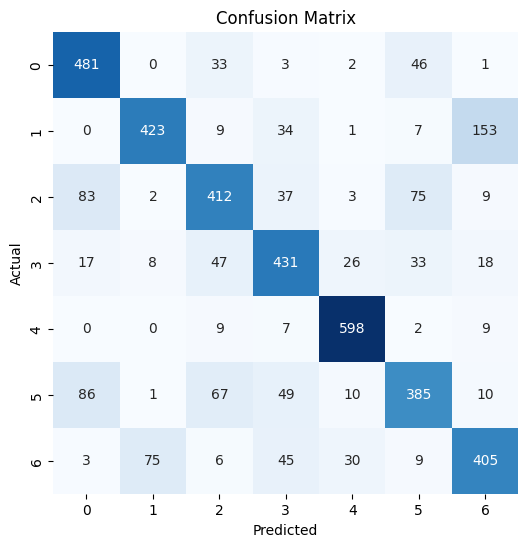

In [46]:
cm = confusion_matrix(y_test, predicted.cpu())

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()